# 2-Layer Neural Network

1. Size of layers and initializing parameters
2. Forward propagation
3. Loss function and cost function
4. Backward propagation
5. Update parameters
6. Prediction with learning parameters weight and bias
7. Create model

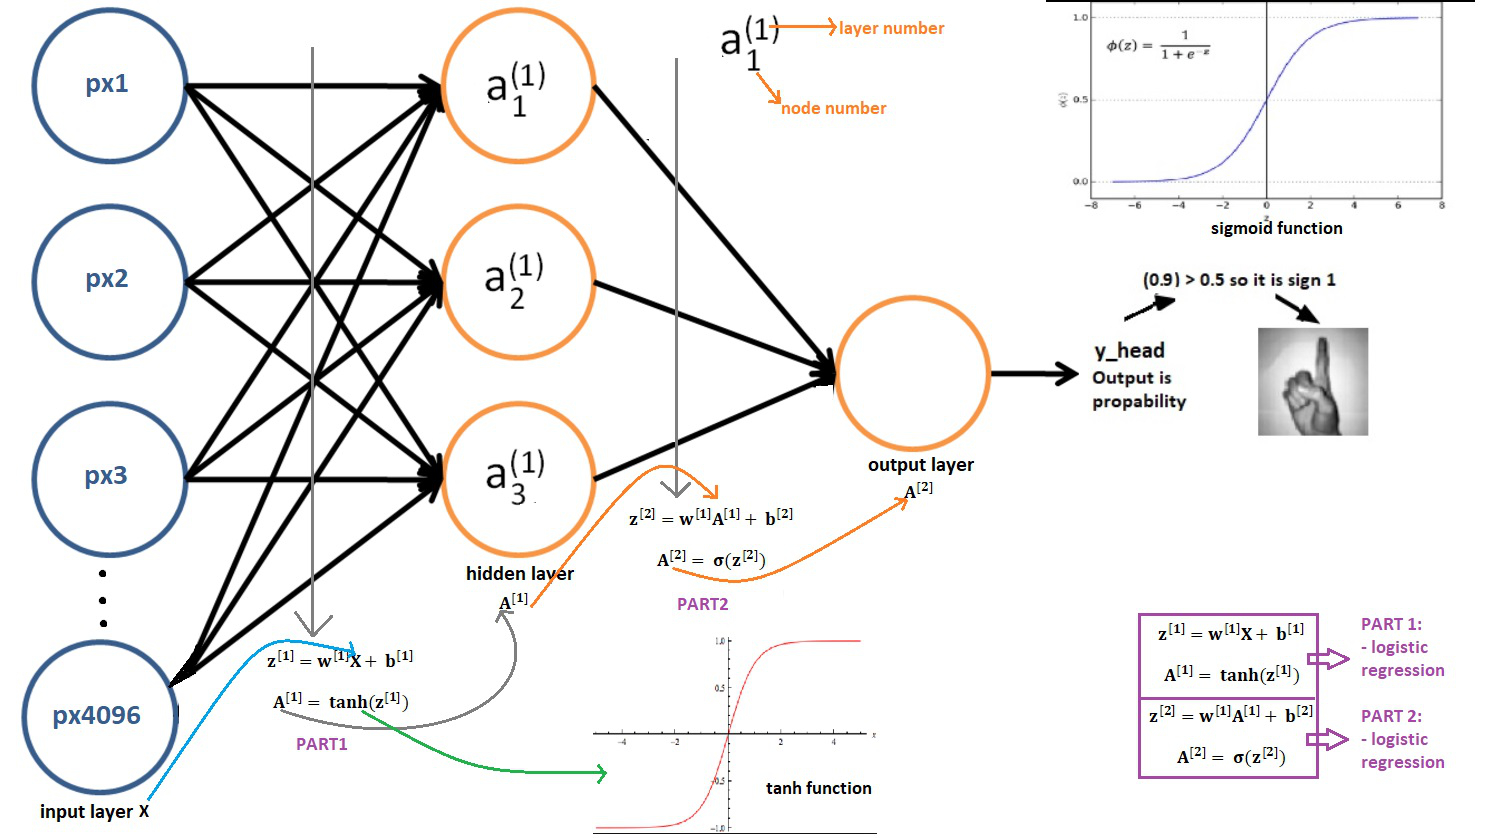

In [16]:
from PIL import Image
Image.open("photo2.jpg")

In [1]:
import numpy as np

## 1. Initialize Parameters and Layer Sizes

In [2]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
   
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                 "bias1": np.zeros((3,1)),
                 "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                 "bias2": np.zeros((y_train.shape[0], 1))}

In [3]:
# x_train.shape[0] = 4096 = 64 piksel x 64 piksel
# 3 node 

In [4]:
np.random.rand(2,3)
# mean = 0
# variance = 1

array([[0.05031514, 0.78955508, 0.05568739],
       [0.73539557, 0.44846648, 0.56477158]])

In [5]:
np.zeros((3,1))

array([[0.],
       [0.],
       [0.]])

In [6]:
# np.zeros(3,1)
# output: TypeError: Cannot interpret '1' as a data type

## 2. Forward Propagation

In [7]:
def forward_propagation_NN(x_train, parameters):
    
    Z1 = np.dot(parameters["weight"], x_train) + parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

# parameters: weight1, bais1, weight2, bias2

In [8]:
# dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
# source: NumPy documendation

## 3. Loss Function and Cost Function

In [9]:
# compute cost

def compute_cost_NN(A2, Y, parameters):
    
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs) / Y.shape[1]
    return cost

## 4. Backward Propagation

In [10]:
def backward_propagation_NN(parameters, cache, X, Y):
    
    dZ2 = cache["A2"] - Y
    dW2 = np.dot(dZ2, cache["A1"].T) / X.shape[1]
    db2 = np.sum(dZ2, axis=1, keepdims = True) / X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T, dZ2) * (1-np.power(cache["A1"],2))
    dW1 = np.dot(dZ1, X.T) / X.shape[1]
    db1 = np.sum(dZ1, axis=1, leepdims = True) / X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    
    return grads

In [11]:
# keepdims = keeping array

## 5. Update Parameters

In [12]:
def update_parameters_NN(parameters, grads, learning_rate=0.01):
    
    parameters = {"weight1": parameters["weight1"] - learning_rate*grads["dweight1"],
                 "bias1": parameters["bias1"] - learning_rate*grads["bias1"],
                 "weight2": parameters["weight2"] - learning_rate*grads["weight2"],
                 "bias2": parameters["bias2"] - learning_rate*grads["bias2"],}
    
    return parameters


## 6. Prediction

In [13]:
def predict_NN(parameters,x_test):
    
    
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

## 7. Create ANN Model

In [14]:
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    
    cost_list = []
    index_list = []
    
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
        
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
        
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
        
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

    parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

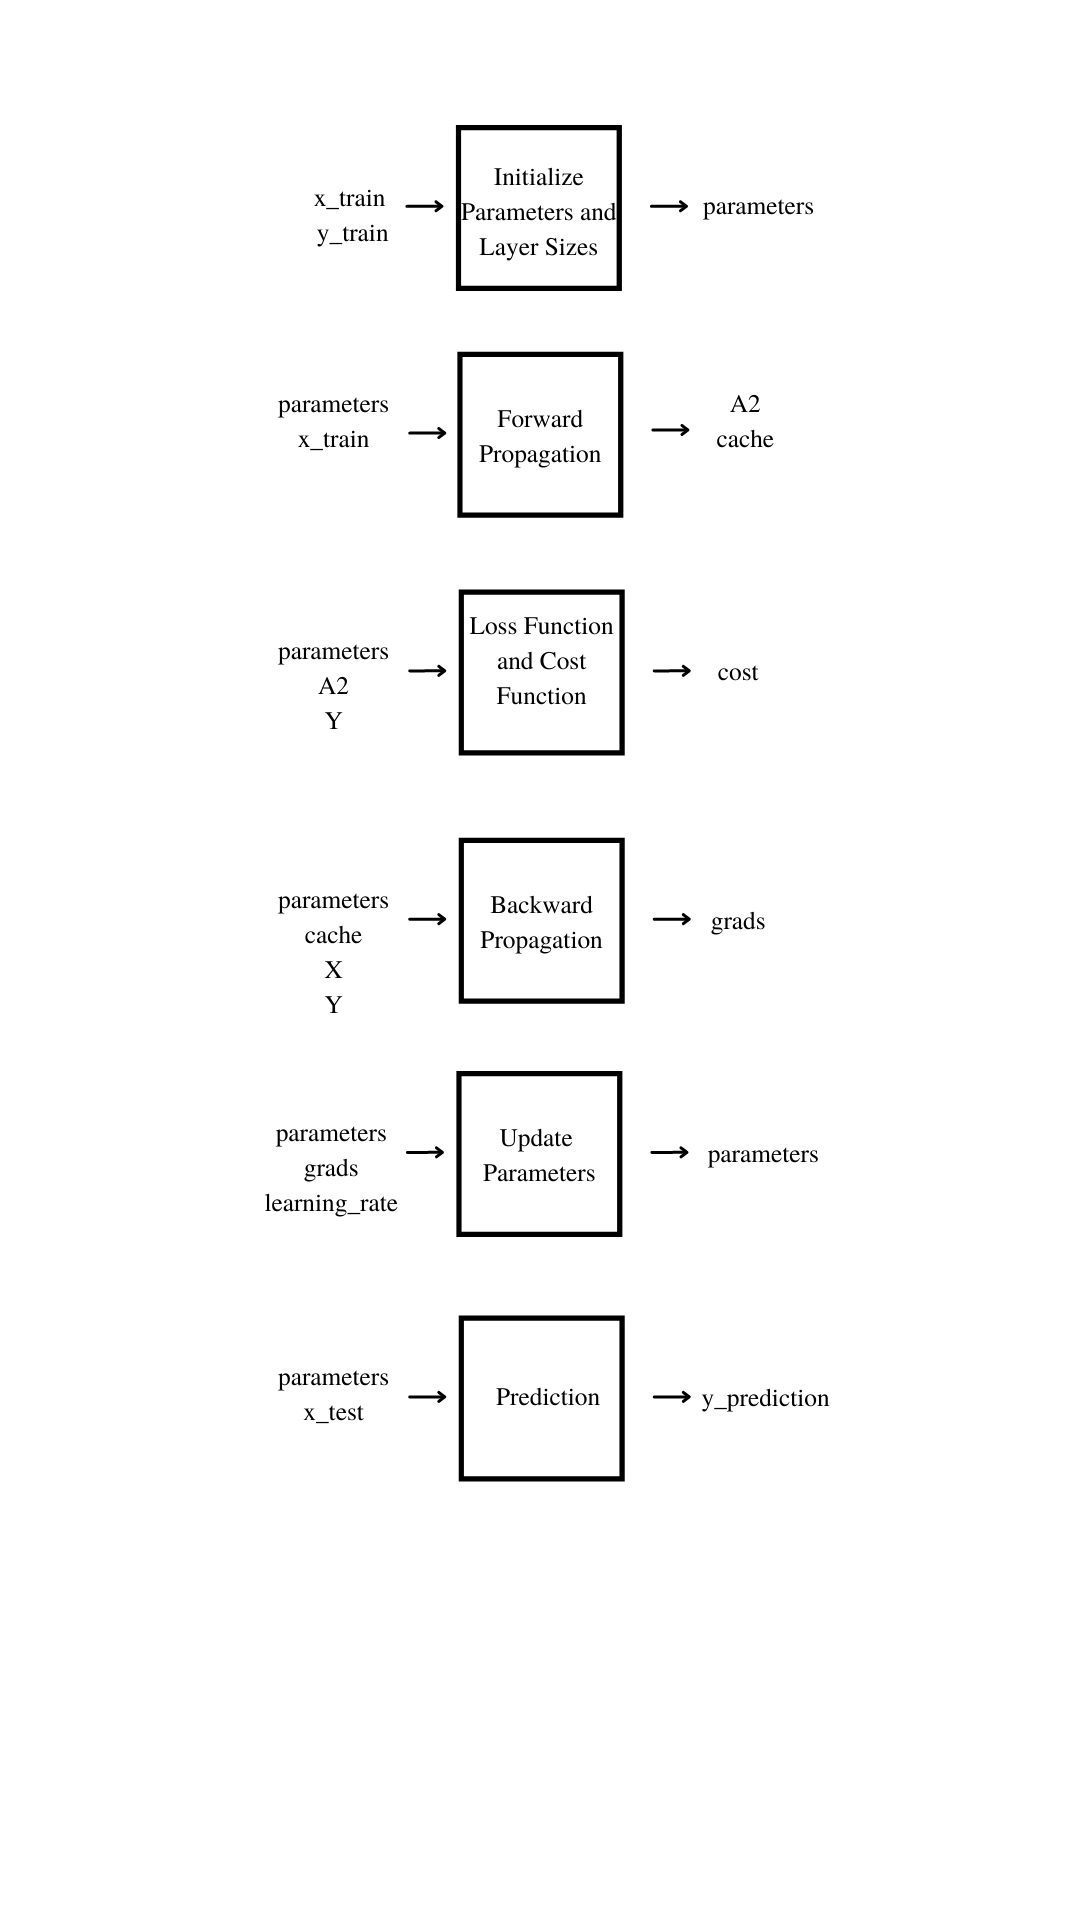

In [15]:
from PIL import Image
Image.open("photo.png")